<a href="https://colab.research.google.com/github/gabena98/ML_project/blob/main/MonkNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import make_scorer, accuracy_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [ ]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [6]:
# load the dataset
monks_1_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MONK/monk_1_train_hot.csv',
                            names=["y", "x1_1", "x1_2", "x1_3", "x2_1", "x2_2", "x2_3", "x3_1", "x3_2", "x4_1", "x4_2", "x4_3", "x5_1", "x5_2", "x5_3", "x5_4", "x6_1", "x6_2"])
monks_2_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MONK/monk_2_train_hot.csv',
                            names=["y", "x1_1", "x1_2", "x1_3", "x2_1", "x2_2", "x2_3", "x3_1", "x3_2", "x4_1", "x4_2", "x4_3", "x5_1", "x5_2", "x5_3", "x5_4", "x6_1", "x6_2"])
monks_3_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MONK/monk_3_train_hot.csv',
                            names=["y", "x1_1", "x1_2", "x1_3", "x2_1", "x2_2", "x2_3", "x3_1", "x3_2", "x4_1", "x4_2", "x4_3", "x5_1", "x5_2", "x5_3", "x5_4", "x6_1", "x6_2"])
monks_1_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MONK/monk_1_test_hot.csv',
                           names=["y", "x1_1", "x1_2", "x1_3", "x2_1", "x2_2", "x2_3", "x3_1", "x3_2", "x4_1", "x4_2", "x4_3", "x5_1", "x5_2", "x5_3", "x5_4", "x6_1", "x6_2"])
monks_2_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MONK/monk_2_test_hot.csv',
                           names=["y", "x1_1", "x1_2", "x1_3", "x2_1", "x2_2", "x2_3", "x3_1", "x3_2", "x4_1", "x4_2", "x4_3", "x5_1", "x5_2", "x5_3", "x5_4", "x6_1", "x6_2"])
monks_3_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MONK/monk_3_test_hot.csv', 
                           names=["y", "x1_1", "x1_2", "x1_3", "x2_1", "x2_2", "x2_3", "x3_1", "x3_2", "x4_1", "x4_2", "x4_3", "x5_1", "x5_2", "x5_3", "x5_4", "x6_1", "x6_2"])

In [ ]:
monks_1_train

,y,x1_1,x1_2,x1_3,x2_1,x2_2,x2_3,x3_1,x3_2,x4_1,x4_2,x4_3,x5_1,x5_2,x5_3,x5_4,x6_1,x6_2
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
120,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
121,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
122,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


# **Nuovo input**

In [7]:
X_1_tr = monks_1_train.iloc[:,1:].values
y_1_tr = monks_1_train.iloc[:,0].values

X_2_tr = monks_2_train.iloc[:,1:].values
y_2_tr = monks_2_train.iloc[:,0].values

X_3_tr = monks_3_train.iloc[:,1:].values
y_3_tr = monks_3_train.iloc[:,0].values

X_test_1 = monks_1_test.iloc[:,1:].values
y_test_1 = monks_1_test.iloc[:,0].values

X_test_2 = monks_2_test.iloc[:,1:].values
y_test_2 = monks_2_test.iloc[:,0].values

X_test_3 = monks_3_test.iloc[:,1:].values
y_test_3 = monks_3_test.iloc[:,0].values

# **MONK 1**

In [34]:
...
# define the keras model for monk 1
model_1 = Sequential()
model_1.add(Dense(4, input_shape=(X_1_tr.shape[1],), activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))
...

Ellipsis

In [35]:
...
# compile the keras model
model_1.summary()
opt = tf.keras.optimizers.experimental.SGD(0.02, momentum=0.09)
model_1.compile(loss='mean_squared_error', optimizer = opt, metrics=['accuracy'])
...

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 72        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


Ellipsis

In [36]:
%%time
# fit the keras model on the dataset
history1 = model_1.fit(X_1_tr, y_1_tr,validation_data=(X_test_1,y_test_1) ,epochs=150, batch_size=1)
...

Epoch 1/150
124/124 [==============================] - 1s 6ms/step - loss: 0.2578 - accuracy: 0.5403 - val_loss: 0.2553 - val_accuracy: 0.5440
Epoch 2/150
124/124 [==============================] - 1s 7ms/step - loss: 0.2474 - accuracy: 0.6048 - val_loss: 0.2503 - val_accuracy: 0.5509
Epoch 3/150
124/124 [==============================] - 1s 5ms/step - loss: 0.2369 - accuracy: 0.6129 - val_loss: 0.2441 - val_accuracy: 0.5625
Epoch 4/150
124/124 [==============================] - 1s 7ms/step - loss: 0.2266 - accuracy: 0.6129 - val_loss: 0.2382 - val_accuracy: 0.5856
Epoch 5/150
124/124 [==============================] - 1s 5ms/step - loss: 0.2170 - accuracy: 0.6613 - val_loss: 0.2321 - val_accuracy: 0.6065
Epoch 6/150
124/124 [==============================] - 1s 7ms/step - loss: 0.2070 - accuracy: 0.7016 - val_loss: 0.2259 - val_accuracy: 0.6204
Epoch 7/150
124/124 [==============================] - 1s 5ms/step - loss: 0.1958 - accuracy: 0.7177 - val_loss: 0.2187 - val_accuracy: 0.6551

Ellipsis

In [17]:
...
# evaluate the keras model
_, accuracy = model_1.evaluate(X_test_1, y_test_1, )
print('Accuracy: %.2f' % (accuracy*100))

14/14 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 1.0000
Accuracy: 100.00


Train: 1.0000 Test: 1.0000


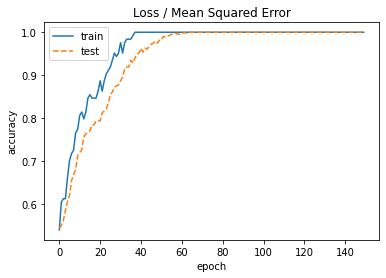

In [38]:
1#Evaluate model
from matplotlib import pyplot
_, train_mse = model_1.evaluate(X_1_tr, y_1_tr, verbose=0)
_, test_mse = model_1.evaluate(X_test_1,y_test_1,verbose=0)
print('Train: %.4f Test: %.4f'%(train_mse,test_mse))
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history1.history['accuracy'], label='train')
pyplot.plot(history1.history['val_accuracy'], label='test',linestyle="dashed")
pyplot.xlabel('epoch')
pyplot.ylabel('accuracy')
pyplot.legend()
pyplot.show()

# **MONK 2**

In [39]:
...
# define the keras model for monk 2
model_2 = Sequential()
model_2.add(Dense(4, input_shape=(X_test_2.shape[1],), activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))
...

Ellipsis

In [40]:
...
# compile the keras model
model_2.summary()
opt = tf.keras.optimizers.experimental.SGD(learning_rate = 0.05, momentum=0.09)
model_2.compile(loss='mean_squared_error', optimizer = opt, metrics=['accuracy'])
...

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 4)                 72        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


Ellipsis

In [41]:
%%time
# fit the keras model on the dataset
history2 = model_2.fit(X_2_tr, y_2_tr,validation_data=(X_test_2,y_test_2) , epochs=50, batch_size=1)
...

Epoch 1/50
169/169 [==============================] - 2s 7ms/step - loss: 0.2410 - accuracy: 0.5740 - val_loss: 0.2267 - val_accuracy: 0.5648
Epoch 2/50
169/169 [==============================] - 1s 4ms/step - loss: 0.2247 - accuracy: 0.5503 - val_loss: 0.2138 - val_accuracy: 0.6713
Epoch 3/50
169/169 [==============================] - 1s 5ms/step - loss: 0.2113 - accuracy: 0.6154 - val_loss: 0.2063 - val_accuracy: 0.5972
Epoch 4/50
169/169 [==============================] - 1s 4ms/step - loss: 0.2006 - accuracy: 0.6272 - val_loss: 0.1937 - val_accuracy: 0.6065
Epoch 5/50
169/169 [==============================] - 1s 5ms/step - loss: 0.1878 - accuracy: 0.6627 - val_loss: 0.1822 - val_accuracy: 0.6065
Epoch 6/50
169/169 [==============================] - 1s 5ms/step - loss: 0.1762 - accuracy: 0.6686 - val_loss: 0.1727 - val_accuracy: 0.6713
Epoch 7/50
169/169 [==============================] - 1s 4ms/step - loss: 0.1671 - accuracy: 0.7337 - val_loss: 0.1672 - val_accuracy: 0.6296
Epoch 

Ellipsis

In [42]:
...
# evaluate the keras model
_, accuracy = model_2.evaluate(X_test_2, y_test_2, )
print('Accuracy: %.2f' % (accuracy*100))

14/14 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Accuracy: 100.00


Train: 1.0000 Test: 1.0000


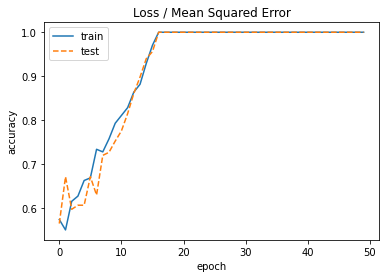

In [44]:
#Evaluate model
from matplotlib import pyplot
_, train_mse = model_2.evaluate(X_2_tr, y_2_tr, verbose=0)
_, test_mse = model_2.evaluate(X_test_2,y_test_2,verbose=0)
print('Train: %.4f Test: %.4f'%(train_mse,test_mse))
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history2.history['accuracy'], label='train')
pyplot.plot(history2.history['val_accuracy'], label='test',linestyle="dashed" )
pyplot.xlabel('epoch')
pyplot.ylabel('accuracy')
pyplot.legend()
pyplot.show()

# **MONK 3**

In [45]:
...
# define the keras model for monk 3
model_3 = Sequential()
model_3.add(Dense(3, input_shape=(X_test_3.shape[1],), activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))
...

Ellipsis

In [46]:
...
# compile the keras model
model_3.summary()
opt = tf.keras.optimizers.SGD(learning_rate = 0.1, momentum=0.5)
model_3.compile(loss='mean_squared_error', optimizer = opt, metrics=['accuracy'])
...

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 3)                 54        
                                                                 
 dense_13 (Dense)            (None, 1)                 4         
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


Ellipsis

In [47]:
%%time
# fit the keras model on the dataset
history3 = model_3.fit(X_3_tr, y_3_tr,validation_data=(X_test_3,y_test_3) ,epochs=100, batch_size=1)
...

Epoch 1/100
122/122 [==============================] - 1s 8ms/step - loss: 0.2222 - accuracy: 0.6557 - val_loss: 0.1522 - val_accuracy: 0.8704
Epoch 2/100
122/122 [==============================] - 1s 5ms/step - loss: 0.1165 - accuracy: 0.9016 - val_loss: 0.0608 - val_accuracy: 0.9722
Epoch 3/100
122/122 [==============================] - 1s 7ms/step - loss: 0.0736 - accuracy: 0.9344 - val_loss: 0.0413 - val_accuracy: 0.9722
Epoch 4/100
122/122 [==============================] - 1s 7ms/step - loss: 0.0660 - accuracy: 0.9344 - val_loss: 0.0358 - val_accuracy: 0.9722
Epoch 5/100
122/122 [==============================] - 1s 8ms/step - loss: 0.0636 - accuracy: 0.9344 - val_loss: 0.0325 - val_accuracy: 0.9722
Epoch 6/100
122/122 [==============================] - 1s 5ms/step - loss: 0.0621 - accuracy: 0.9344 - val_loss: 0.0309 - val_accuracy: 0.9722
Epoch 7/100
122/122 [==============================] - 1s 5ms/step - loss: 0.0602 - accuracy: 0.9344 - val_loss: 0.0247 - val_accuracy: 0.9769

Ellipsis

In [50]:
...
# evaluate the keras model
_, accuracy = model_3.evaluate(X_test_3, y_test_3, )
print('Accuracy: %.2f' % (accuracy*100))

14/14 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9745
Accuracy: 97.45


Train: 0.9836 Test: 0.9745


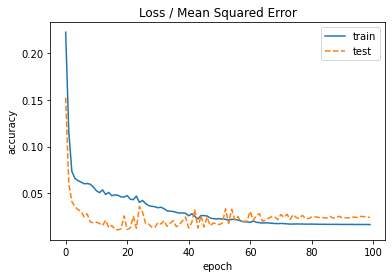

In [49]:
#Evaluate model
from matplotlib import pyplot
_, train_mse = model_3.evaluate(X_3_tr, y_3_tr, verbose=0)
_, test_mse = model_3.evaluate(X_test_3,y_test_3,verbose=0)
print('Train: %.4f Test: %.4f'%(train_mse,test_mse))
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history3.history['loss'], label='train')
pyplot.plot(history3.history['val_loss'], label='test', linestyle="dashed")
pyplot.xlabel('epoch')
pyplot.ylabel('accuracy')
pyplot.legend()
pyplot.show()

# **MONK 3 regolarizzato**

In [ ]:
...
# define the keras model for monk 3
model_3 = Sequential()
model_3.add(Dense(3, input_shape=(X_test_3.shape[1],), activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))
...

Ellipsis

In [ ]:
...
# compile the keras model
model_3.summary()
opt = tf.keras.optimizers.SGD(learning_rate = 0.1, momentum=0.5, decay=1e-2)
model_3.compile(loss='mean_squared_error', optimizer = opt, metrics=['accuracy'])
...

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 54        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


Ellipsis

In [ ]:
%%time
# fit the keras model on the dataset
history3_reg = model_3.fit(X_3_tr, y_3_tr,validation_data=(X_test_3,y_test_3) ,epochs=100, batch_size=1)
...

Epoch 1/100
122/122 [==============================] - 1s 7ms/step - loss: 0.2242 - accuracy: 0.6475 - val_loss: 0.1629 - val_accuracy: 0.8519
Epoch 2/100
122/122 [==============================] - 1s 7ms/step - loss: 0.1360 - accuracy: 0.9098 - val_loss: 0.0999 - val_accuracy: 0.9514
Epoch 3/100
122/122 [==============================] - 1s 7ms/step - loss: 0.0953 - accuracy: 0.9262 - val_loss: 0.0687 - val_accuracy: 0.9722
Epoch 4/100
122/122 [==============================] - 1s 6ms/step - loss: 0.0783 - accuracy: 0.9344 - val_loss: 0.0615 - val_accuracy: 0.9722
Epoch 5/100
122/122 [==============================] - 1s 7ms/step - loss: 0.0714 - accuracy: 0.9344 - val_loss: 0.0528 - val_accuracy: 0.9722
Epoch 6/100
122/122 [==============================] - 1s 5ms/step - loss: 0.0674 - accuracy: 0.9344 - val_loss: 0.0485 - val_accuracy: 0.9722
Epoch 7/100
122/122 [==============================] - 1s 7ms/step - loss: 0.0649 - accuracy: 0.9344 - val_loss: 0.0472 - val_accuracy: 0.9722

Ellipsis

In [ ]:
...
# evaluate the keras model
_, accuracy = model_3.evaluate(X_test_3, y_test_3, )
print('Accuracy: %.2f' % (accuracy*100))

14/14 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9722
Accuracy: 97.22


Train: 0.9344 Test: 0.9722


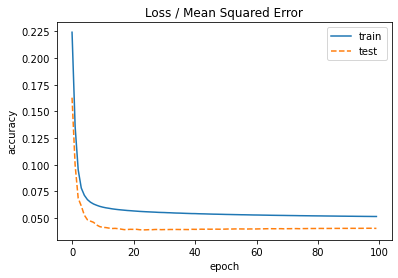

In [ ]:
#Evaluate model
from matplotlib import pyplot
_, train_mse = model_3.evaluate(X_3_tr, y_3_tr, verbose=0)
_, test_mse = model_3.evaluate(X_test_3,y_test_3,verbose=0)
print('Train: %.4f Test: %.4f'%(train_mse,test_mse))
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history3_reg.history['loss'], label='train')
pyplot.plot(history3_reg.history['val_loss'], label='test', linestyle="dashed")
pyplot.xlabel('epoch')
pyplot.ylabel('accuracy')
pyplot.legend()
pyplot.show()